In [29]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
n_task_per_file = 50
n_files = 10
base_dir = "vary_signa_L_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [31]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [32]:
oper_char_df

,Coverage Rate,Length,MSE,Method,SD(Y)
0,0.666667,1.021337,1.394262,RRT,1.0
1,0.857143,2.472180,1.140945,Tree-Values,1.0
2,0.833333,1.964407,1.375792,UV(0.1),1.0
3,0.666667,2.277645,4.741372,RRT,2.0
4,0.714286,5.279494,5.301360,Tree-Values,2.0
...,...,...,...,...,...
595,1.000000,13.448007,27.480107,Tree-Values,5.0
596,0.833333,9.561740,26.893774,UV(0.1),5.0
597,0.800000,10.555423,107.452592,RRT,10.0
598,1.000000,22.873564,115.774773,Tree-Values,10.0


In [33]:
oper_char_df = oper_char_df[oper_char_df['Method'] != "UV(0.1)"]

In [34]:
oper_char_df.index = range(oper_char_df.shape[0])

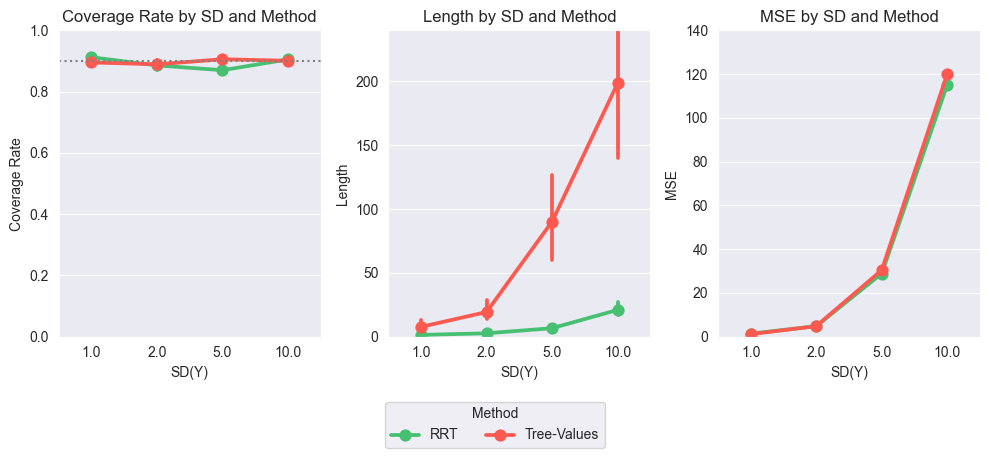

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='SD(Y)', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=["#48c072", "#fc5a50"])
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('SD(Y)')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,240)
    elif metric == "MSE":
        axes[i].set_ylim(0,140)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [36]:
means = oper_char_df.groupby(["SD(Y)", 'Method'])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,SD(Y),Method,Coverage Rate,Length,MSE
0,1.0,RRT,0.912419,1.423674,1.393173
1,1.0,Tree-Values,0.895500,7.710528,1.168872
2,2.0,RRT,0.885724,2.676616,4.819492
3,2.0,Tree-Values,0.889274,19.366206,4.832596
4,5.0,RRT,0.870100,6.694700,28.875871
5,5.0,Tree-Values,0.905945,90.195210,30.414058
6,10.0,RRT,0.905414,21.021630,115.183919
7,10.0,Tree-Values,0.900810,198.602318,120.054359


In [25]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [26]:
oper_char_df[tree_flag].groupby(['SD(Y)'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,SD(Y),proportion_infinity
0,1.0,0.0
1,2.0,0.0
2,5.0,0.0
3,10.0,0.0


NameError: name 'defaultdict' is not defined

In [45]:
word = "xabc"

In [47]:
i = 3
word[0:i] + word[i+1:]

'xab'

In [1]:
from collections import defaultdict

In [12]:
a = set()
def fun(a):
    a.add("x")
fun(a)

In [13]:
a

{'x'}